1. [x] Carregamento de datasets do seaborn

2. [x] Tradução das colunas

3. [x] Tarifa paga por sexo

    Passagem mais caras de mulheres

4. [x] Idade por sexo

    Mulheres são mais novas

5. [x] Quantidade de homes e mulheres

    Mais homens (60%).
    
6. [x] Cidade de embarque

    A maioria embarcou em Southampton

7. [x] Sobreviventes por sexo



In [97]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [98]:
df = sns.load_dataset("titanic")

In [99]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [100]:
novo_nome_colunas = {
    'survived': 'sobreviveu',
    'pclass': 'classe_passagem',
    'sex': 'sexo',
    'age': 'idade',
    'sibsp': 'irmãos_cônjuges_abordo',
    'parch': 'pais_filhos_abordo',
    'fare': 'tarifa',
    'embarked': 'local_embarque',
    'class': 'classe',
    'who': 'quem',
    'adult_male': 'homem_adulto',
    'deck': 'convés',
    'embark_town': 'cidade_embarque',
    'alive': 'vivo',
    'alone': 'sozinho'
}

df = df.rename(columns = novo_nome_colunas)

In [101]:
df.head()

,sobreviveu,classe_passagem,sexo,idade,irmãos_cônjuges_abordo,pais_filhos_abordo,tarifa,local_embarque,classe,quem,homem_adulto,convés,cidade_embarque,vivo,sozinho
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


(0.0, 100.0)

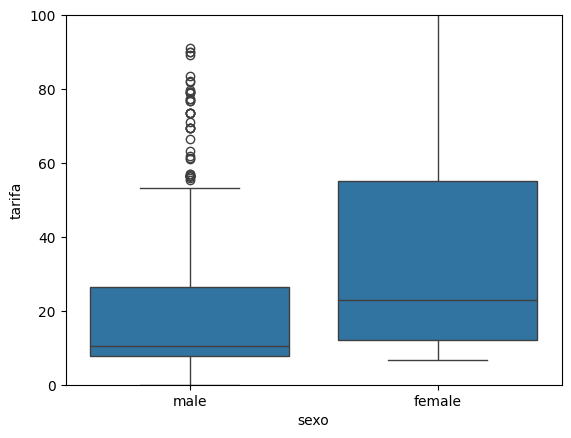

In [60]:
# Tarifa paga por sexo

sns.boxplot(x = "sexo", y = "tarifa", data = df)
plt.ylim(0, 100)

(15.0, 40.0)

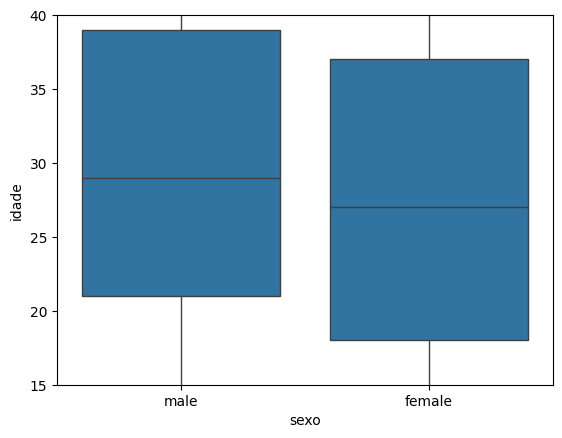

In [61]:
# Idade por sexo

sns.boxplot(x = "sexo", y = "idade", data = df)
plt.ylim(15, 40)

sexo
male      0.647587
female    0.352413
Name: proportion, dtype: float64


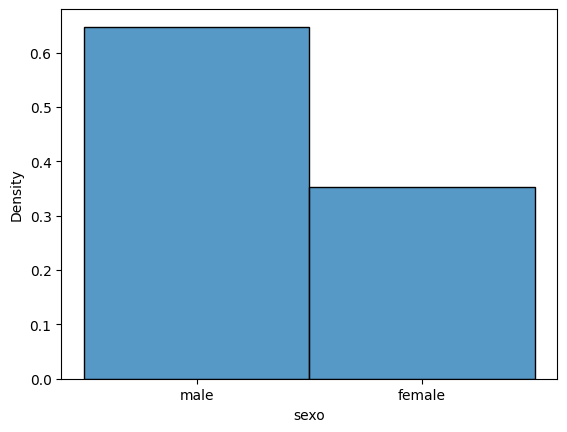

In [62]:
# Quntidade de homes e mulheres

sns.histplot(x = "sexo", data = df, stat = "density")
sexo = df.sexo.value_counts(normalize = True)
print(f"{sexo}")

<Axes: xlabel='cidade_embarque', ylabel='Count'>

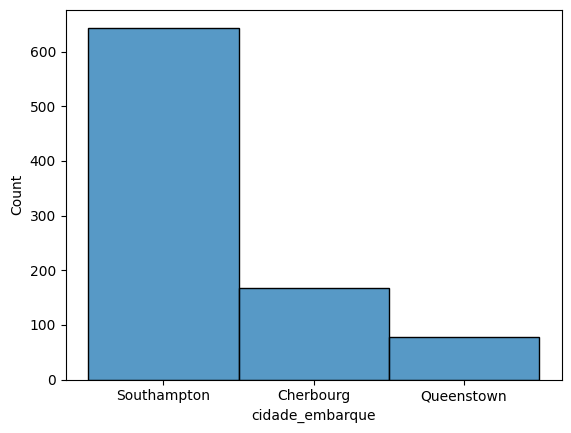

In [63]:
# Cidade de embarque

sns.histplot(x = "cidade_embarque", data = df)

sexo    vivo
male    no      0.525253
female  yes     0.261504
male    yes     0.122334
female  no      0.090909
Name: proportion, dtype: float64


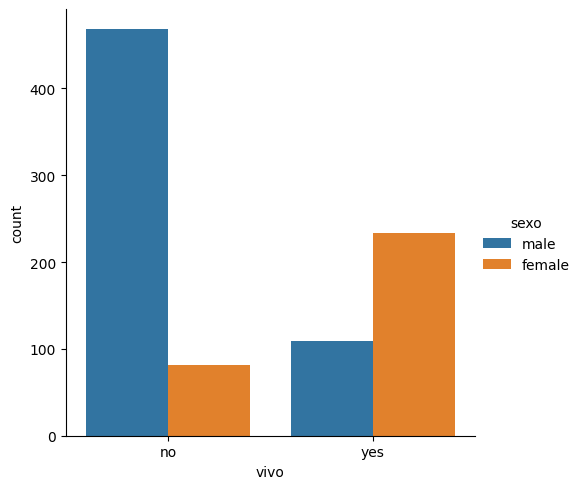

In [64]:
# Sobreviventes
sns.catplot(x = "vivo", hue = "sexo", kind = "count", data = df)
print(df[["sexo", "vivo"]].value_counts(normalize = True))

In [65]:
df.head()

,sobreviveu,classe_passagem,sexo,idade,irmãos_cônjuges_abordo,pais_filhos_abordo,tarifa,local_embarque,classe,quem,homem_adulto,convés,cidade_embarque,vivo,sozinho
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [66]:
# Teste Tukeyhds

In [108]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import missingno as mn

In [109]:
df.idade.describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: idade, dtype: float64

<Axes: >

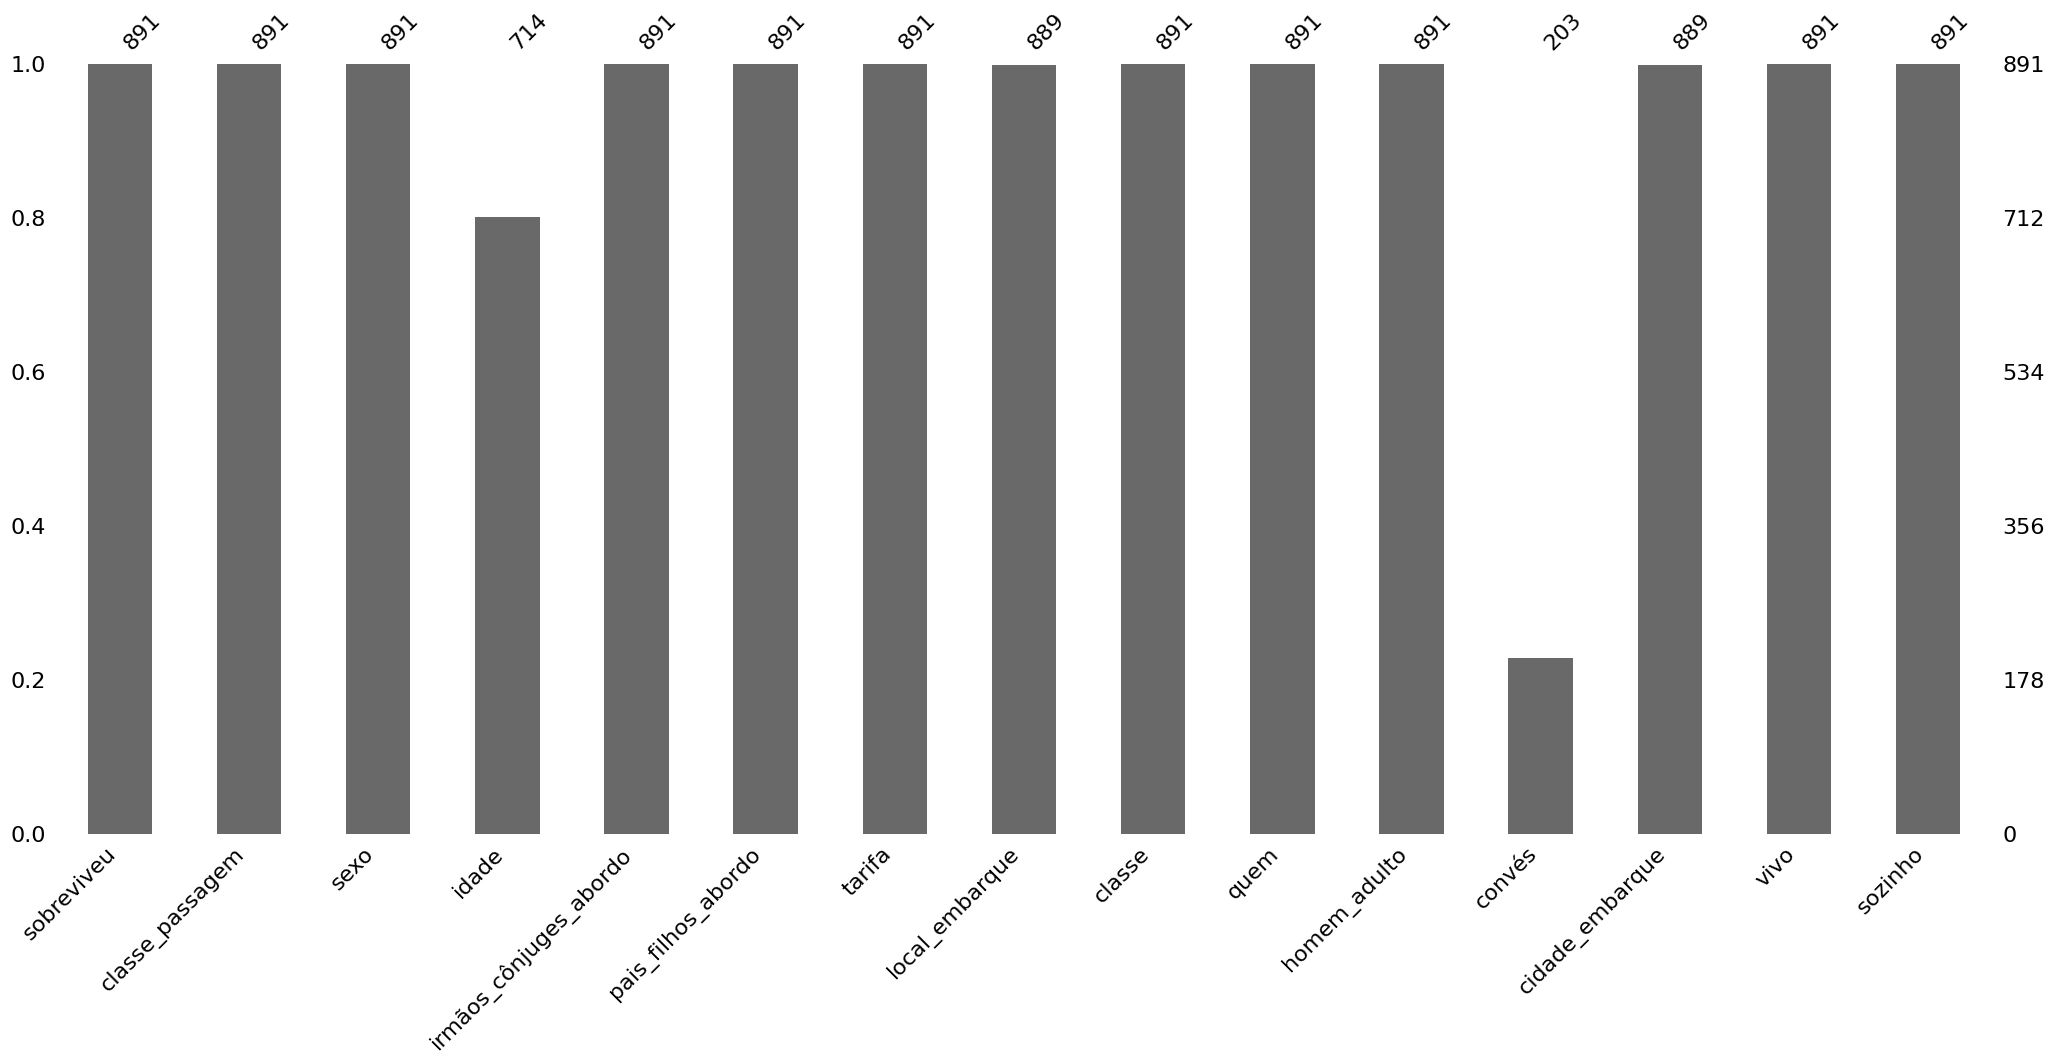

In [111]:
mn.bar(df)


In [112]:
df = df.dropna(subset=['idade'])  # Remove linhas onde 'idade' ou 'classe' são NaN


In [113]:
print(df.groupby('classe')['idade'].size())


classe
First     186
Second    173
Third     355
Name: idade, dtype: int64


C:\Users\Marcelo DL\AppData\Local\Temp\ipykernel_19068\537950141.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('classe')['idade'].size())


In [114]:
result = pairwise_tukeyhsd(df.idade, df.classe, 0.05)

In [115]:
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 First Second  -8.3558    0.0 -11.7041  -5.0075   True
 First  Third -13.0928    0.0 -15.9622 -10.2234   True
Second  Third   -4.737 0.0005  -7.6763  -1.7977   True
------------------------------------------------------


In [90]:
result = pairwise_tukeyhsd(df.tarifa, df.classe, 0.05)

In [91]:
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
 First Second -63.4925   0.0 -72.9165 -54.0685   True
 First  Third -70.4791   0.0 -78.1489 -62.8094   True
Second  Third  -6.9866 0.108 -15.1064   1.1331  False
-----------------------------------------------------


In [84]:
result = pairwise_tukeyhsd(endog = df.tarifa, groups = df.classe, alpha = 0.01)

In [71]:
df[["classe", "tarifa", "sexo"]].groupby(by = ["classe", "sexo"]).agg(mean = ("tarifa", "mean"))

C:\Users\Marcelo DL\AppData\Local\Temp\ipykernel_19068\2423095456.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[["classe", "tarifa", "sexo"]].groupby(by = ["classe", "sexo"]).agg(mean = ("tarifa", "mean"))


mean
classe sexo              
First  female  106.125798
       male     67.226127
Second female   21.970121
       male     19.741782
Third  female   16.118810
       male     12.661633

In [72]:
106.125798 - 67.226127


38.899671

In [73]:
df["classe_sexo"] = df.classe.astype(str) + " " + df.sexo.astype(str)

In [74]:
result = pairwise_tukeyhsd(df.tarifa, df.classe_sexo, 0.05)

In [75]:
print(result)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2    meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------
 First female    First male -38.8997    0.0  -54.1513  -23.648   True
 First female Second female -84.1557    0.0 -101.2987 -67.0127   True
 First female   Second male  -86.384    0.0 -102.0599 -70.7081   True
 First female  Third female  -90.007    0.0 -104.7429 -75.2711   True
 First female    Third male -93.4642    0.0  -106.386 -80.5423   True
   First male Second female  -45.256    0.0  -61.4957 -29.0163   True
   First male   Second male -47.4843    0.0   -62.167 -32.8017   True
   First male  Third female -51.1073    0.0  -64.7819 -37.4328   True
   First male    Third male -54.5645    0.0  -66.2615 -42.8675   True
Second female   Second male  -2.2283 0.9989  -18.8672  14.4105  False
Second female  Third female  -5.8513 0.8968  -21.6077   9.9051  False
Second female    Thi

In [76]:
df.head(3)

,sobreviveu,classe_passagem,sexo,idade,irmãos_cônjuges_abordo,pais_filhos_abordo,tarifa,local_embarque,classe,quem,homem_adulto,convés,cidade_embarque,vivo,sozinho,classe_sexo
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Third female
